# Titanic Project

Problem Statement:
    
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [108]:
#importing the data
df=pd.read_csv('titanic.csv')

In [109]:
#checking the shape of data
df.shape

(891, 12)

The dataset contains 891 rows and 12 columns.

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
#checking column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# About the columns:

PassengerID :- ID of the passenger

Survived    :- Whether the passenger survived(1) or died(0)

Pclass      :- Class of travel

Name        :- Name of the passenger

Sex         :- Sex(gender) of passenger

Age         :- Age of the passenger

SibSp       :- No. of siblings/ spouse on the ship

Parch       :- No. of parents/ children on the ship

Ticket      :- Ticket number

Fare        :- Passenger fare 

Cabin       :- Cabin number

Embarked    :- Port of Embarkation 

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId,Survived,Pclass,sibSp,Parch are of int type.

Age and Fare are of float type.

Name, Sex, Ticket, Cabin and Embarked columns are of object type.

In [113]:
df['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [114]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [115]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [116]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

The columns PassengerId, Name, Cabin and Ticket doesn't contribute in predicting whether a passenger survivied or not.Therefore it's better to remove them.

In [117]:
#Removing unnecessary columns
df.drop(columns=['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

In [118]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [119]:
#Checking null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

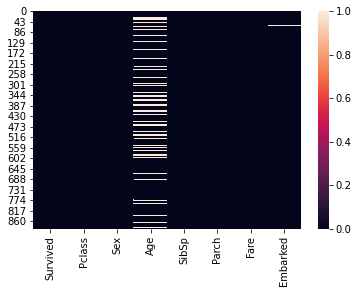

In [120]:
sns.heatmap(df.isnull())

We have 177 null values in age column and 2 null values in embarked columns.

In [121]:
#Treating Age column null values, lets check description on age column
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Minimum age is 0.4 and maximun is 80.

The mean is 29.6 and median is 28.

In [122]:
#Replacing null vaues with the median
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='median')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))

In [123]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [124]:
#Replacing null values of Embarked column with mode as it is categorical data.
imp=SimpleImputer(strategy='most_frequent')
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [125]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

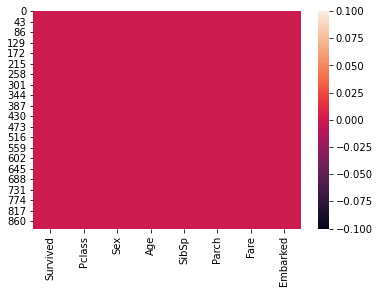

In [126]:
sns.heatmap(df.isnull())

All the null values are being replaced.

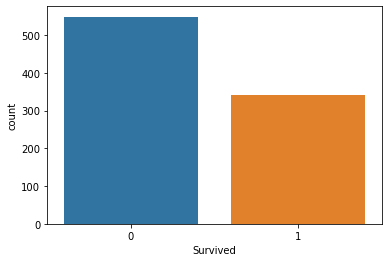

In [127]:
#Let's check how many passengers survied
sns.countplot(x='Survived', data=df)

In [128]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Out of 891 passengers 342 survived and 549 died. It shows that more people died than survived, survival rate is lower than the death rate.

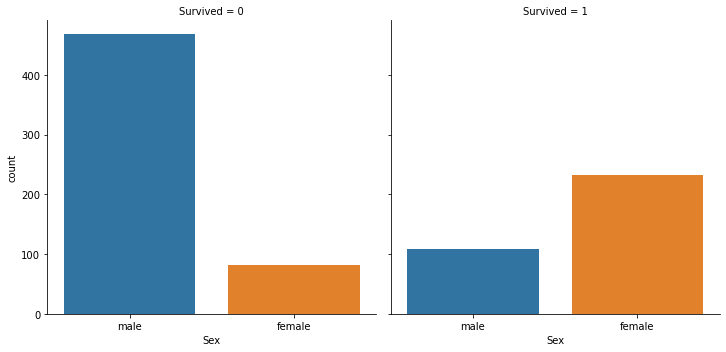

In [129]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df)

In [130]:
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

Female survival rate is higher than male survival rate.

In [131]:
#Lets check the percentage of women survived vs men survived
print("% of women survived: " , df[df.Sex == 'female'].Survived.sum()/df[df.Sex == 'female'].Survived.count())
print("% of men survived:   " , df[df.Sex == 'male'].Survived.sum()/df[df.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


In [132]:
#Checking the survival rate according to class of travel
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

There are 3 Pclasses :- 1, 2 and 3

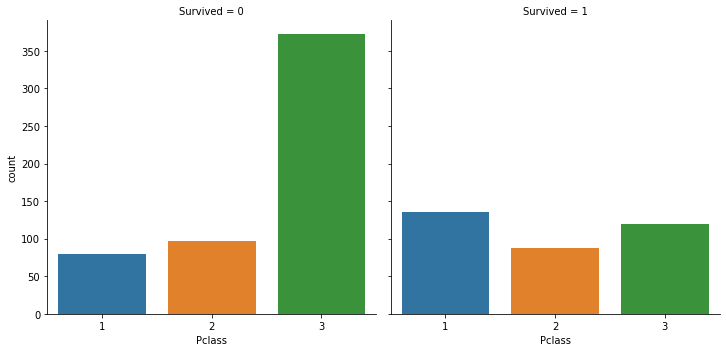

In [133]:
sns.catplot(x='Pclass', col='Survived', kind='count', data=df)

Most of the passengers died who were in 3rd class.
Priority was given to 1st class passengers while rescuing.

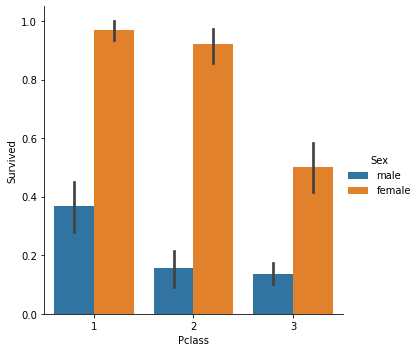

In [134]:
sns.catplot('Pclass','Survived',hue='Sex', kind='bar', data=df)

Most of the women from class 1 and 2 survived.

Most of the men from class 2 and 3 died.

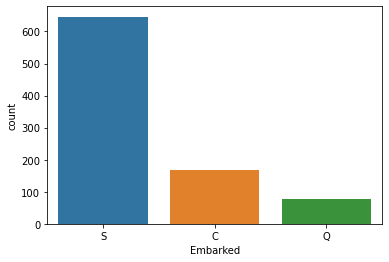

In [135]:
#Lets see the embarked stations.
sns.countplot(df.Embarked)

Majority of the passengers are from 'S' port.

Least passengers are from 'Q' port.

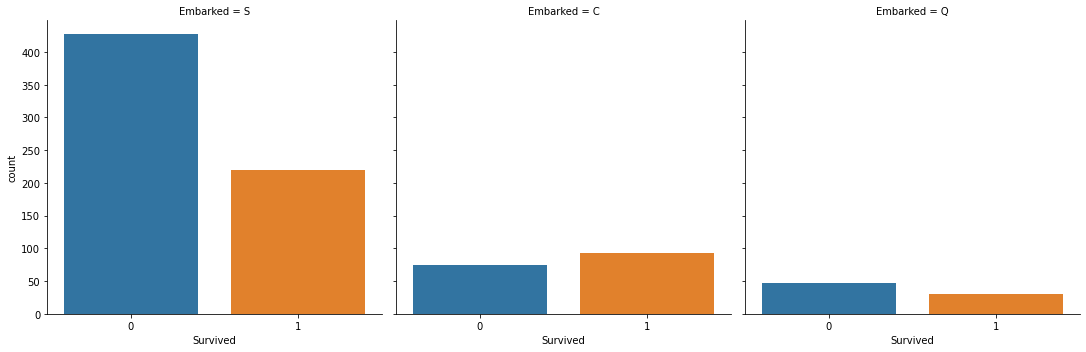

In [136]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df)

Survival rate for 'S' is lowest and highest for 'C' port.

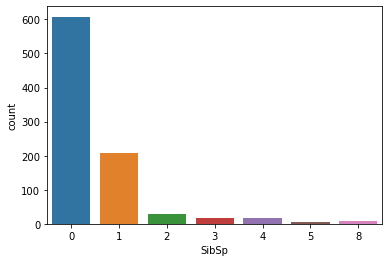

In [137]:
sns.countplot(df.SibSp)

In [138]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Majority of passengers doesn't have any sibling/ spouse.

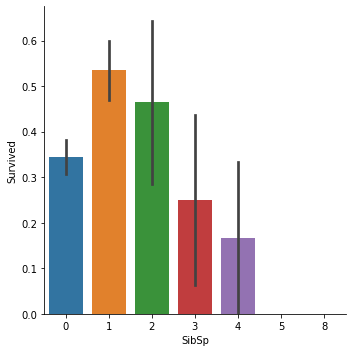

In [139]:
sns.catplot('SibSp','Survived', kind='bar', data=df)

As the no. of Siblings increases the survival rate decreases.

In [140]:
pd.crosstab(df.SibSp,df.Pclass)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Passengers having 3 and more siblings travelled in class 3.

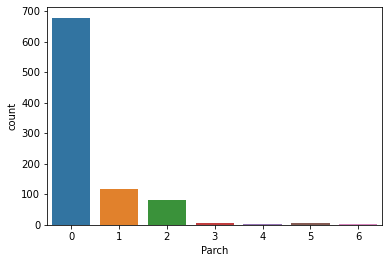

In [141]:
#Lets see how many passennger were travelling with their parents and children.
sns.countplot(df.Parch)

In [142]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Most of the passengers were travelling alone.

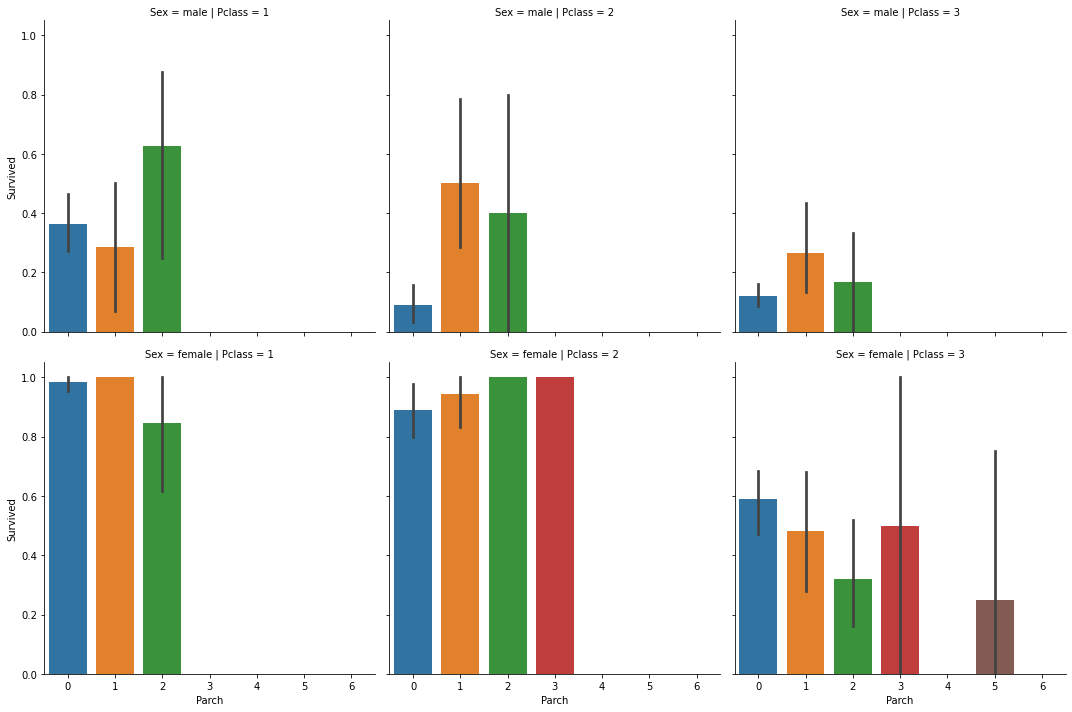

In [143]:
sns.catplot('Parch','Survived', col='Pclass' , row = 'Sex', kind='bar', data=df)

In [144]:
pd.crosstab([df.Sex, df.Survived], [df.Parch, df.Pclass], margins=True).style.background_gradient(cmap='Blues')

All females with Parch = 4 and Pclass = 3 died. All females with Parch > 4 died. For females with Parch = 1 and Pclass = 3 survival rate is below 0.5.

For males,all survival rates below 0.5 for any values of Parch, except for Parch = 2 and Pclass = 1.

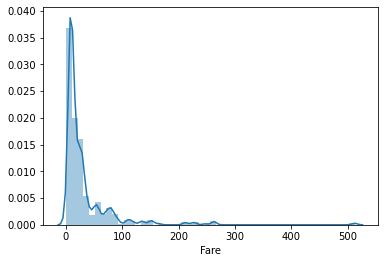

In [145]:
sns.distplot(df.Fare)

In [146]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

The maximun fare is 512 and mimimu is 0.

Lets see how many records are with 0 fare.

Skewness id present in fare.

In [147]:
df[df.Fare==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.0,0,0,0.0,S
263,0,1,male,40.0,0,0,0.0,S
271,1,3,male,25.0,0,0,0.0,S
277,0,2,male,28.0,0,0,0.0,S
302,0,3,male,19.0,0,0,0.0,S
413,0,2,male,28.0,0,0,0.0,S
466,0,2,male,28.0,0,0,0.0,S
481,0,2,male,28.0,0,0,0.0,S
597,0,3,male,49.0,0,0,0.0,S
633,0,1,male,28.0,0,0,0.0,S


In [148]:
df[df.Fare==0].count()

Survived    15
Pclass      15
Sex         15
Age         15
SibSp       15
Parch       15
Fare        15
Embarked    15
dtype: int64

There are 15 passengers with Fare = 0 and all of them are male and only 1 of them survived.

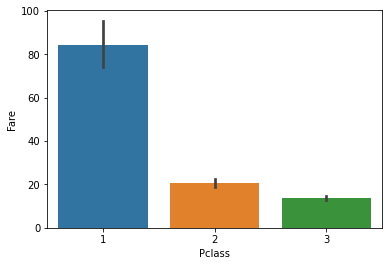

In [149]:
sns.barplot(y="Fare", x="Pclass", data=df)

Fare for 1st class is very high than 2nd and 3rd class.

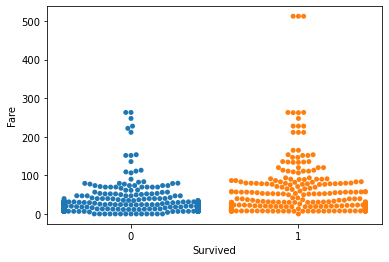

In [150]:
sns.swarmplot(y="Fare", x="Survived", data=df)

Passengers given high fare are given priority while rescuing as high fare means they travelled in 1st class.

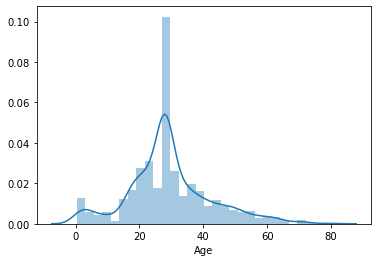

In [151]:
sns.distplot(df.Age)

Most of the passengers were between the 20 and 40 years of age.

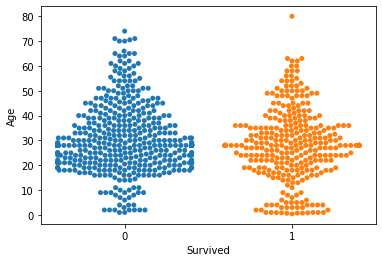

In [152]:
sns.swarmplot(x='Survived',y='Age',data=df)

Their is no priority of any age group with respect to survival.

In [153]:
#Checking the description of the data
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age and Fare have differnece between 75% and maximun, this means that these columns have skewness.

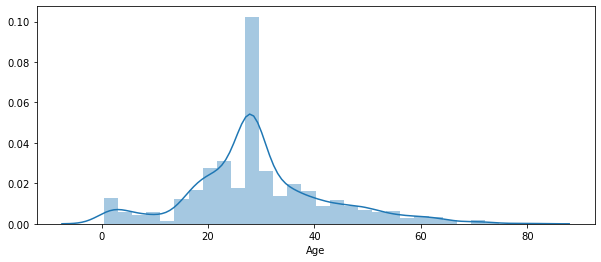

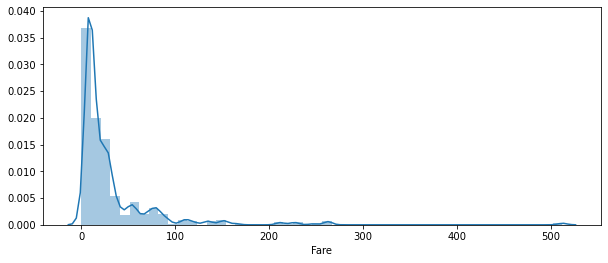

In [154]:
#Checking distribution of the data
for i in df.columns:
    if df[i].dtypes==float or df[i].dtypes == int:
        plt.figure(figsize=(10,4))
        sns.distplot(df[i],kde=True)
        plt.show()

In [155]:
#cheking the correlation
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


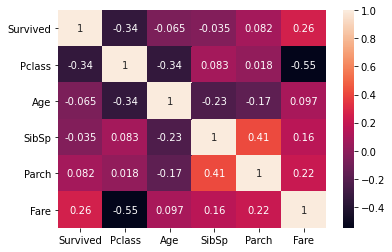

In [156]:
sns.heatmap(df.corr(),annot=True)

Survival and Fare have positive correlation.


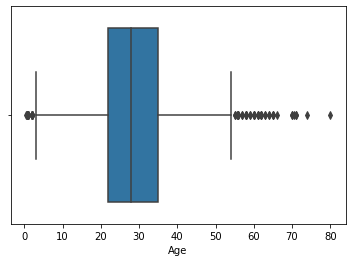

In [157]:
sns.boxplot(df['Age'])

Age can be 80 of passenf=gers therefore it can't be treated as outlier.

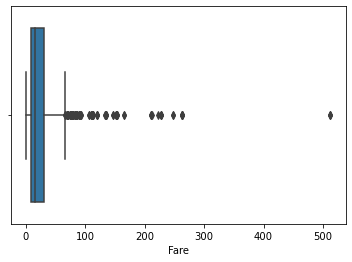

In [158]:
sns.boxplot(df['Fare'])

In [169]:
x=df.iloc[:,1:]
y=df.iloc[:,0]
x.shape,y.shape

((891, 7), (891,))

In [170]:
#Checking skewness
x.skew()

Pclass   -0.630548
Age       0.510245
SibSp     3.695352
Parch     2.749117
Fare      4.787317
dtype: float64

Keeping +/- 0.5 as the range for skewness, Fare have skewness.

In [173]:
#removing skewness from fare column
x['Fare']=np.sqrt(x['Fare'])

In [174]:
x.skew()

Pclass   -0.630548
Age       0.510245
SibSp     3.695352
Parch     2.749117
Fare      0.519679
dtype: float64

In [179]:
x.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,1.640909,S
1,1,female,38.0,1,0,2.905674,C
2,3,female,26.0,0,0,1.677837,S
3,1,female,35.0,1,0,2.699440,S
4,3,male,35.0,0,0,1.684414,S


In [181]:
#Converting String data to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Sex']=le.fit_transform(x['Sex'])
x['Embarked']=le.fit_transform(x['Embarked'])

In [182]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,1.640909,2
1,1,0,38.0,1,0,2.905674,0
2,3,0,26.0,0,0,1.677837,2
3,1,0,35.0,1,0,2.699440,2
4,3,1,35.0,0,0,1.684414,2


In [183]:
#Scaling data using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
a=sc.fit_transform(x)
a=pd.DataFrame(a,columns=x.columns)

In [184]:
a.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.760079,0.585954
1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,1.275730,-1.942303
2,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.700638,0.585954
3,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.943767,0.585954
4,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.690051,0.585954


In [185]:
x=a
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.760079,0.585954
1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,1.275730,-1.942303
2,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.700638,0.585954
3,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.943767,0.585954
4,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.690051,0.585954


# Finding the best random state

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is',maxacc,'on random state', maxrs)

Best accuracy is 0.8470149253731343 on random state 93


In [187]:
#We will split out train ans test data with random_state 93
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=93)

In [188]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623, 7), (268, 7), (623,), (268,))

In [189]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [190]:
gnb=GaussianNB()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [191]:
model=[lr,gnb,rf,ada,knn,dtc,svc]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('\n')
    print('accuracy score:',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m, x, y, cv=5)
    print('Cross Validation Score:',score.mean())
    print('auc score:',roc_auc_score(y_test,pred))



accuracy score: LogisticRegression()
0.8470149253731343
[[153  17]
 [ 24  74]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       170
           1       0.81      0.76      0.78        98

    accuracy                           0.85       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.85      0.85      0.85       268

Cross Validation Score: 0.785638064151654
auc score: 0.8275510204081633


accuracy score: GaussianNB()
0.8208955223880597
[[146  24]
 [ 24  74]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       170
           1       0.76      0.76      0.76        98

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

Cross Validation Score: 0.7677358609001319
auc score: 0.8069627851140456


accuracy score: RandomForestClassifier()
0.84

SVC model is performing well among others, with accuracy of 86%, cross validation score of 82% and auc score of 82%.

# Hyper parameter tuning

In [194]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['linear','poly', 'rbf'], 'C':[1,10]}
clf= GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [205]:
sv=SVC(kernel='rbf',C=1)
sv.fit(x_train,y_train)

SVC(C=1)

In [206]:
predgcv=sv.predict(x_test)

In [207]:
print('Accuracy score :', accuracy_score(y_test,predgcv))
score=cross_val_score(clf.best_estimator_, x, y, cv=5)
print('Cross Validation Score:',score.mean())
print(classification_report(y_test,predgcv))

Accuracy score : 0.8582089552238806
Cross Validation Score: 0.8249074132195091
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       170
           1       0.88      0.71      0.79        98

    accuracy                           0.86       268
   macro avg       0.86      0.83      0.84       268
weighted avg       0.86      0.86      0.85       268



In [212]:
#Lets save our model
import joblib
joblib.dump(sv,'Survival_prediction_svc.obj')

['Survival_prediction_svc.obj']